# Examen Tema 3

#### Nombre: Pedro Ramos Suárez
#### DNI: 76591270M

Importamos todas las bibliotecas que vamos a usar:

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

Definimos variables y la función:

In [2]:
a = 0
b = 1
ya = 1

In [3]:
x, y0, t = sp.symbols('x, y_0, t')

def f(t, x):
    return (t-x)/2

In [4]:
y = sp.Function('y')
edo = y(t).diff() - f(t, y(t))
display(sp.Eq(edo, 0))

Eq(-t/2 + y(t)/2 + Derivative(y(t), t), 0)

In [5]:
edo_sol = sp.dsolve(edo)
display(edo_sol)

Eq(y(t), (C1 + (t - 2)*exp(t/2))*exp(-t/2))

In [6]:
ics = {y(0): y0}
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
display(CI_eq)

Eq(y_0, C1 - 2)

In [7]:
CI_sol = sp.solve(CI_eq)
edo_sol.subs(CI_sol[0])

Eq(y(t), (y_0 + (t - 2)*exp(t/2) + 2)*exp(-t/2))

In [8]:
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
display(sol_exacta)

((t - 2)*exp(t/2) + 3)*exp(-t/2)

Definimos los 3 métodos que vamos a usar: El método de euler mejorado o del punto medio, el método de euler modificado o de Heun, y el método de Runge-Kutta con 2 evaluaciones:

In [9]:
def eulerPuntoMedio(F, x0, y0, xfinal, h):
    ''' Método de Euler mejorado o del punto medio para resolver el PVI
    RETURNS:
        X,Y     = integrate(F, x0, y0, xfinal, N)
    PARAMS:
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        N       = número de nodos
    '''
    N = int((xfinal - x0) / h)
    X = np.linspace(x0, xfinal, N+1)
    Y = [y0];

    for n in range(N):
        Y.append(Y[n] + h * F(X[n] + h / 2, Y[n] + h / 2 * F(X[n], Y[n])))

    return np.array(X), np.array(Y)

def eulerHeun(F, x0, y0, xfinal, h):
    ''' Método de Euler modificado o de Heun para resolver el PVI
    RETURNS:
        X,Y     = integrate(F, x0, y0, xfinal, N)
    PARAMS:
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        N       = número de nodos
    '''
    N = int((xfinal - x0) / h)
    X = np.linspace(x0, xfinal, N+1)
    Y = [y0];
    y1 = sp.Symbol('y1')

    for n in range(N):
        Y.append(Y[n] + h / 2 * ( F(X[n], Y[n]) + F(X[n+1], Y[n] + h * F(X[n], Y[n]))))
    return np.array(X), np.array(Y)

def rungeKutta2(F, x0, y0, xfinal, h):
    ''' Método de Runge-Kutta de cuarto orden para resolver
        el problema de valores iniciales {y}' = {F(x,{y})}, 
        donde    {y} = {y[0],y[1],...y[N-1]}.
        X,Y    = integrate(F,x0,y0,xfinal,h).
        x0,y0  = condiciones iniciales
        xfinal = valor final de x
        N      = número de subintervalos de la partición
        h      = incremento de x usado en la integración
        F      = función suplida por el usuario que devuelve el
                array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''

    def RK2(F, xn, yn, h):
        K1 = F(xn, yn)
        K2 = F(xn + 2 / 3 * h, yn + 2 / 3 * h * K1)
        return (K1 + 3 * K2) / 4
    
    N = int((xfinal - x0) / h)
    X = np.linspace(x0, xfinal, N + 1)
    Y = [y0];
    for n in range(N):
        Y.append(Y[n] + h * RK2(F, X[n], Y[n], h))
    return np.array(X), np.array(Y)

Representamos las gráficas con sus errores:

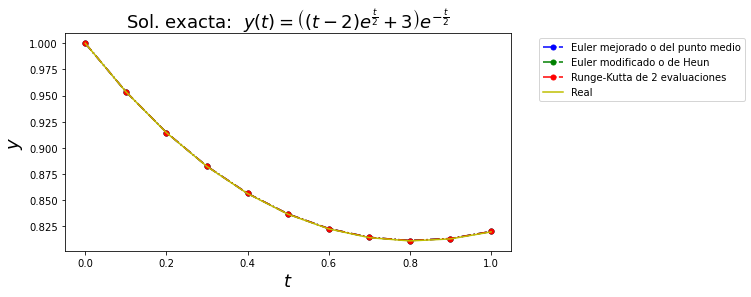

Error de Euler Mejorado o del punto medio: 0.000393623839967439 
Error de Euler modificado o de Heun: 0.000393623839967328 
Error de Runge-Kutta de 2 evaluaciones: 0.000393623839967439.

El mejor método es el de Heun.


In [15]:
h = 0.1
nodos = int((b - a) / h)

# Aplicamos todos los métodos
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxPuntoMedio, yyPuntoMedio = eulerPuntoMedio(f, a, ya, b, h)
xxHeun, yyHeun = eulerHeun(f, a, ya, b, h)
xxRungeKutta, yyRungeKutta = rungeKutta2(f, a, ya, b, h)

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxPuntoMedio, yyPuntoMedio, 'b-.o', label='Euler mejorado o del punto medio', markersize=5)
ax.plot(xxHeun, yyHeun, 'g-.o', label='Euler modificado o de Heun', markersize=5)
ax.plot(xxHeun, yyHeun, 'r-.o', label='Runge-Kutta de 2 evaluaciones', markersize=5)
ax.plot(xx, yy, 'y', label='Real') # Solución real

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorPuntoMedio = abs(yy - yyPuntoMedio).max()
errorHeun = abs(yy - yyHeun).max()
errorRungeKutta = abs(yy - yyRungeKutta).max()
print('Error de Euler Mejorado o del punto medio: {} \nError de Euler modificado o de Heun: {} \nError de Runge-Kutta de 2 evaluaciones: {}.'.format(errorPuntoMedio, errorHeun, errorRungeKutta))

# Debido a que los errores son muy parecidos, hacemos la comprobación con Python para tener mayor exactitud
if errorPuntoMedio < errorHeun and errorPuntoMedio < errorRungeKutta:
    print('\nEl mejor método es el del punto medio.')
elif errorHeun < errorPuntoMedio and errorHeun < errorRungeKutta:
    print('\nEl mejor método es el de Heun.')
elif errorRungeKutta < errorPuntoMedio and errorRungeKutta < errorHeun:
    print('\nEl mejor método es el de Runge-Kutta.')
else:
    print('\nNo puedo determinar el mejor método.')

Como podemos ver, el método con menor error es el de Heun, que es ligeramente menor que el del punto medio y que el de Runge-Kutta con 2 evaluaciones, por lo que el mejor método a usar sería el de Heun.